Task-05

Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from lazypredict.Supervised import LazyClassifier

In [3]:
df=pd.read_csv(r'C:\Users\harsh\Downloads\US_Accidents_March23.csv\US_Accidents_March23.csv')

In [4]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.87,-84.06,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.93,-82.83,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.06,-84.03,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.75,-84.21,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.63,-84.19,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00,-117.38,34.00,-117.37,0.54,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.77,-117.15,32.77,-117.15,0.34,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.78,-117.85,33.78,-117.86,0.56,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99,-118.40,33.98,-118.40,0.77,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.columns.values

array(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country',
       'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [7]:
nan_counts = df.isnull().sum()
print(nan_counts)

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [8]:
df.drop(columns=['ID', 'Source',"Start_Lat", "Start_Lng", "End_Lat", "End_Lng","End_Time", "Weather_Timestamp","Zipcode","Street","Country", 'Description','Airport_Code', "Timezone"], inplace=True)

In [9]:
print(df.shape)
df.dropna(inplace = True)
print(df.shape)

(7728394, 32)
(5217919, 32)


In [10]:
df.columns.values

array(['Severity', 'Start_Time', 'Distance(mi)', 'City', 'County',
       'State', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition',
       'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype=object)

In [11]:
column_name = 'City'
value_counts = df[column_name].value_counts()
print(value_counts)

Miami                           158906
Los Angeles                     104080
Houston                          91891
Charlotte                        87887
Orlando                          86909
                                 ...  
Iredell                              1
David City                           1
Moxee                                1
Mesilla Park                         1
American Fork-Pleasant Grove         1
Name: City, Length: 11295, dtype: int64


In [12]:
column_name = 'County'
value_counts = df[column_name].value_counts()
print(value_counts)

Los Angeles    302804
Miami-Dade     215762
Orange         177904
Dallas         102179
Harris          96981
                ...  
Frontier            1
Tuscola             1
Terry               1
Gasconade           1
Ness                1
Name: County, Length: 1735, dtype: int64


In [13]:
column_name = 'State'
value_counts = df[column_name].value_counts()
print(value_counts)

CA    1122294
FL     672595
TX     330291
SC     273175
NY     246391
NC     227290
VA     225851
PA     216011
MN     149791
OR     138763
TN     125254
AZ     111561
LA     110633
IL     101402
MI      97315
GA      96450
NJ      96174
MD      80939
AL      77378
OH      74475
UT      65585
CO      61402
WA      60496
CT      52940
MO      51479
OK      48158
MA      37420
IN      35961
MT      26335
WI      22504
AR      19752
KY      18961
IA      17832
DC      15767
KS      15377
NV      14452
WV      11403
DE      10884
MS      10332
NE      10003
ID       8995
RI       8694
NM       6306
NH       5416
ND       2712
WY       2514
ME       1427
VT        575
SD        204
Name: State, dtype: int64


In [14]:
df_processed=df.drop(columns=["County","City"])

In [15]:
df_processed

,Severity,Start_Time,Distance(mi),State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
5,3,2016-02-08 07:44:26,0.01,OH,37.90,35.50,97.00,29.63,7.00,SSW,...,False,False,False,False,False,False,Day,Day,Day,Day
9,3,2016-02-08 08:10:04,0.01,OH,37.40,33.80,100.00,29.62,3.00,SSW,...,False,False,False,False,False,False,Day,Day,Day,Day
11,3,2016-02-08 08:21:27,0.01,OH,37.40,33.80,100.00,29.62,3.00,SSW,...,False,False,False,False,False,False,Day,Day,Day,Day
14,2,2016-02-08 08:39:43,0.01,OH,37.40,33.80,100.00,29.62,3.00,SSW,...,False,False,False,False,True,False,Day,Day,Day,Day
20,2,2016-02-08 10:11:15,0.00,OH,33.80,29.60,100.00,29.62,2.00,NNW,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,2,2019-08-23 18:03:25,0.54,CA,86.00,86.00,40.00,28.92,10.00,W,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,2,2019-08-23 19:11:30,0.34,CA,70.00,70.00,73.00,29.39,10.00,SW,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,2,2019-08-23 19:00:21,0.56,CA,73.00,73.00,64.00,29.74,10.00,SSW,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,2,2019-08-23 19:00:21,0.77,CA,71.00,71.00,81.00,29.62,10.00,SW,...,False,False,False,False,False,False,Day,Day,Day,Day


In [16]:
datetime_column = 'Start_Time'

df_processed[datetime_column] = pd.to_datetime(df_processed[datetime_column])

df_processed['year'] = df_processed[datetime_column].dt.year
df_processed['month'] = df_processed[datetime_column].dt.month
df_processed['day'] = df_processed[datetime_column].dt.day
df_processed['hour'] = df_processed[datetime_column].dt.hour

In [17]:
df_processed=df_processed.drop(columns=["Start_Time"])

In [18]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217919 entries, 5 to 7728393
Data columns (total 33 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Distance(mi)           float64
 2   State                  object 
 3   Temperature(F)         float64
 4   Wind_Chill(F)          float64
 5   Humidity(%)            float64
 6   Pressure(in)           float64
 7   Visibility(mi)         float64
 8   Wind_Direction         object 
 9   Wind_Speed(mph)        float64
 10  Precipitation(in)      float64
 11  Weather_Condition      object 
 12  Amenity                bool   
 13  Bump                   bool   
 14  Crossing               bool   
 15  Give_Way               bool   
 16  Junction               bool   
 17  No_Exit                bool   
 18  Railway                bool   
 19  Roundabout             bool   
 20  Station                bool   
 21  Stop                   bool   
 22  Traffic_Calming   

In [19]:
column_name = 'Sunrise_Sunset'
value_counts = df_processed[column_name].value_counts()
print(value_counts)

Day      3529326
Night    1688593
Name: Sunrise_Sunset, dtype: int64


In [20]:
column_name = 'Civil_Twilight'
value_counts = df_processed[column_name].value_counts()
print(value_counts)

Day      3768288
Night    1449631
Name: Civil_Twilight, dtype: int64


In [21]:
categorical_columns = df_processed.select_dtypes(include=['object','bool']).columns
categorical_columns

Index(['State', 'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump',
       'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
       'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [22]:
label_encoder = preprocessing.LabelEncoder()
for column in categorical_columns:
    df_processed[column] = label_encoder.fit_transform(df_processed[column])

In [23]:
column_name = "Severity"
value_counts = df_processed[column_name].value_counts()
print(value_counts)

2    4446908
3     583878
4     125089
1      62044
Name: Severity, dtype: int64


In [24]:
target=df_processed["Severity"]

x=df_processed.drop(columns=["Severity"])

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [25]:
x

,Distance(mi),State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year,month,day,hour
5,0.01,33,37.90,35.50,97.00,29.63,7.00,14,3.50,0.03,...,0,0,0,0,0,0,2016,2,8,7
9,0.01,33,37.40,33.80,100.00,29.62,3.00,14,4.60,0.02,...,0,0,0,0,0,0,2016,2,8,8
11,0.01,33,37.40,33.80,100.00,29.62,3.00,14,4.60,0.02,...,0,0,0,0,0,0,2016,2,8,8
14,0.01,33,37.40,33.80,100.00,29.62,3.00,14,4.60,0.02,...,1,0,0,0,0,0,2016,2,8,8
20,0.00,33,33.80,29.60,100.00,29.62,2.00,8,4.60,0.01,...,0,0,0,0,0,0,2016,2,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,0.54,3,86.00,86.00,40.00,28.92,10.00,19,13.00,0.00,...,0,0,0,0,0,0,2019,8,23,18
7728390,0.34,3,70.00,70.00,73.00,29.39,10.00,15,6.00,0.00,...,0,0,0,0,0,0,2019,8,23,19
7728391,0.56,3,73.00,73.00,64.00,29.74,10.00,14,10.00,0.00,...,0,0,0,0,0,0,2019,8,23,19
7728392,0.77,3,71.00,71.00,81.00,29.62,10.00,15,8.00,0.00,...,0,0,0,0,0,0,2019,8,23,19


In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, target, test_size=0.3, random_state=2)

In [27]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
lgbm_classifier = LGBMClassifier(n_estimators=50, random_state=42)

# Train the classifier
lgbm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgbm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.401911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1373
[LightGBM] [Info] Number of data points in the train set: 3652543, number of used features: 31
[LightGBM] [Info] Start training from score -4.429269
[LightGBM] [Info] Start training from score -0.159918
[LightGBM] [Info] Start training from score -2.189911
[LightGBM] [Info] Start training from score -3.732363
Accuracy: 0.88
[[   8139    8725    1602      28]
 [   2948 1302786   27628     798]
 [   1304  114019   58759     979]
 [     34   32786    3074    1767]]


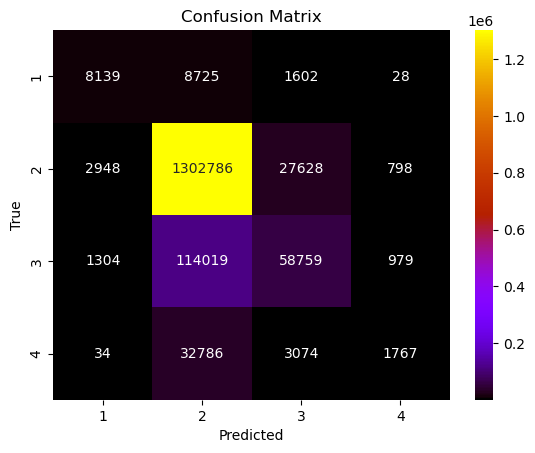

              precision    recall  f1-score   support

           1       0.66      0.44      0.53     18494
           2       0.89      0.98      0.93   1334160
           3       0.65      0.34      0.44    175061
           4       0.49      0.05      0.09     37661

    accuracy                           0.88   1565376
   macro avg       0.67      0.45      0.50   1565376
weighted avg       0.85      0.88      0.85   1565376



In [28]:
import seaborn as sns
from sklearn.metrics import classification_report

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='gnuplot', xticklabels=['1', '2', '3', '4'], yticklabels=['1', '2', '3', '4'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the pipeline
print(classification_report(y_test, y_pred))

In [30]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f1/7d/2e562207176a5dcdad513085670674bb11ffaf37e1393eacb6d7fb502481/scikit_learn-1.3.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.2 MB 3.4 MB/s eta 0:00:03
    --------------------------------------- 0.2/9.2 MB 3.0 MB/s eta 0:00:04
   - -------------------------------------- 0.4/9.2 MB 3.3 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/9.2 MB 4.6 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/9.2 MB 4.5 MB/s eta 0:00:02
   ------ --------------------------------- 1.4/9.2 MB 5.6 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/9.2 MB 5.8 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.2 MB 5.2 MB/s eta 0:00:02
   -------- ---------------

In [32]:
!pip uninstall imbalanced-learn
!pip install imbalanced-learn

SyntaxError: invalid syntax (2563377558.py, line 1)

In [31]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


smote = SMOTE(sampling_strategy='auto', random_state=42)
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Create an imbalanced-learn pipeline
pipeline = Pipeline([
    ('under', under_sampler),
    ('smote', smote)
])

# Apply the pipeline to the training data
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)